In [2]:
import os
import math
import numpy as np
from DatosLogin import login
from Conectores import conectorMSSQL
from PIL import Image
import pandas as pd
from pandas.api.types import CategoricalDtype
import dataframe_image as dfi
import pyodbc #Library to connect to Microsoft SQL Server
import sys
import pathlib
from datetime import datetime
from datetime import timedelta
#sys.path.insert(0,str(pathlib.Path(__file__).parent.parent))
import logging
logging.basicConfig(
    format="%(asctime)s - %(name)s - %(levelname)s - %(message)s"
        , level=logging.INFO
)
logger = logging.getLogger(__name__)


try:
    db_conex = pyodbc.connect(
        "DRIVER={ODBC Driver 17 for SQL Server};\
        SERVER="+login[0]+";\
        DATABASE="+login[1]+";\
        UID="+login[2]+";\
        PWD="+ login[3]
    )
except Exception as e:
    listaErrores = e.args[1].split(".")
    logger.error("\nOcurrió un error al conectar a SQL Server: ")
    for i in listaErrores:
        logger.error(i)
    exit()

In [3]:
# LIBRERIA VANNA
import vanna as vn


c:\Users\gmartinez\AppData\Local\Programs\Python\Python311\Lib\site-packages\snowflake\connector\options.py:103: UserWarning: You have an incompatible version of 'pyarrow' installed (12.0.1), please install a version that adheres to: 'pyarrow<10.1.0,>=10.0.1; extra == "pandas"'
  warn_incompatible_dep(
2023-08-24 08:00:54,049 - snowflake.connector.cursor - WARNING - Failed to import ArrowResult. No Apache Arrow result set format can be used. ImportError: DLL load failed while importing arrow_iterator: No se encontró el proceso especificado.


In [50]:
### API-KEY PARA PODER USAR LA API

## EN CASO DE QUE LA APIKEY NO FUNCIONE, HAY QUE USAR EL SIGUIENTE COMANDO:
#API_KEY = vn.get_api_key(email='gonzamartinez46@gmail.com')
#  INGRESAR EL MAIL COMO PARAMETRO PARA POSTERIORMENTE RECIBIR UN CODIGO DE VERIFICACION
api_key='c0462147f1454af4bc8e21821553df79'

vn.set_api_key(api_key)

c0462147f1454af4bc8e21821553df79


In [14]:
### CREAMOS NUESTRO MODELO
#vn.create_model(model="my-model1", db_type="SQL_SERVER")


True

In [52]:
# FUNCION PARA PODER CORRER CONSULTAS SQL

def run_sql_server(sql: str) -> pd.DataFrame:
    df = pd.read_sql_query(sql, db_conex)
    return df

vn.run_sql = run_sql_server 


In [17]:
vn.add_sql(
       question='Cuales son las promociones de GNC?',
       sql=''' 
 DECLARE @ayer DATETIME
        SET @ayer = DATEADD(day, -1, CAST(GETDATE() AS date))
        DECLARE @inicioMesActual DATETIME
        SET @inicioMesActual = DATEADD(month, DATEDIFF(month, 0, @ayer), 0)

        DECLARE @inicioMesAnterior DATETIME
        SET @inicioMesAnterior = DATEADD(M,-1,@inicioMesActual)

        --Divide por la cant de días del mes anterior y multiplica por la cant de días del
        --mes actual
        
        DECLARE @hoy DATETIME
        SET @hoy = DATEADD(DAY, DATEDIFF(DAY, 0, CURRENT_TIMESTAMP), 0)
        SELECT   emp.UEN,MAX(emp.PRECIO)as 'precio promo',sum(emp.VOLUMEN) as 'volumen promo',emp.FECHASQL,P.DESCRIPCION
        FROM [Rumaos].[dbo].[EmpPromo] AS EmP
            INNER JOIN Promocio AS P 
                ON EmP.UEN = P.UEN 
                AND EmP.CODPROMO = P.CODPROMO
        WHERE FECHASQL >= '2022-01-01'
            AND FECHASQL < @hoy
            and (emp.CODPRODUCTO = 'GNC')
            AND (P.[DESCRIPCION] not like '%PRUEBA%')
    GROUP BY FECHASQL,emp.UEN,P.DESCRIPCION
	order by FECHASQL desc
       ''')

True

In [40]:
vn.add_documentation(documentation="En la organizacion hay 14 estaciones de servicio. El nombre de estas estaciones de servicio se encuentra en la columna 'UEN'. Estas estaciones venden productos, los tipos de producto se encruentran en la columna 'CODPRODUCTO")

True

In [41]:
vn.add_documentation(documentation='''
                     La fecha en las tablas es llamada 'FECHASQL'
                     
                     ''')

True

In [42]:
vn.add_sql(question="Cuanto fueron las ventas de combustible?",
           sql="""SELECT UEN, TURNO, FECHASQL, CODPRODUCTO, VOLUMEN, IMPORTE, PREUNITARIO, VOLAFORADOR, CodPersonal
  FROM Rumaos.dbo.Despapro
  WHERE FECHASQL>='2023-01-01'

           """
           )

True

 
 DECLARE @ayer DATETIME
        SET @ayer = DATEADD(day, -1, CAST(GETDATE() AS date))
        DECLARE @inicioMesActual DATETIME
        SET @inicioMesActual = DATEADD(month, DATEDIFF(month, 0, @ayer), 0)

        DECLARE @inicioMesAnterior DATETIME
        SET @inicioMesAnterior = DATEADD(M,-1,@inicioMesActual)

        --Divide por la cant de días del mes anterior y multiplica por la cant de días del
        --mes actual
        
        DECLARE @hoy DATETIME
        SET @hoy = DATEADD(DAY, DATEDIFF(DAY, 0, CURRENT_TIMESTAMP), 0)
        SELECT   emp.UEN,MAX(emp.PRECIO)as 'precio promo',sum(emp.VOLUMEN) as 'volumen promo',emp.FECHASQL,P.DESCRIPCION
        FROM [Rumaos].[dbo].[EmpPromo] AS EmP
            INNER JOIN Promocio AS P 
                ON EmP.UEN = P.UEN 
                AND EmP.CODPROMO = P.CODPROMO
        WHERE FECHASQL >= '2022-01-01'
            AND FECHASQL < @hoy
            and (emp.CODPRODUCTO = 'GNC')
            AND (P.[DESCRIPCION] not like '%PRUEBA%')
    GRO

C:\Users\gmartinez\AppData\Local\Temp\ipykernel_15828\2164766262.py:4: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,UEN,precio promo,volumen promo,FECHASQL,DESCRIPCION
0,ADOLFO CALLE,144.10,142.72,2023-08-23,GNC CLIENTE ESPECIAL
1,LAS HERAS,155.90,570.92,2023-08-23,GNC COSTO CONTROL
2,MERCADO 2,144.40,291.27,2023-08-23,GNC BENEFICIO EMPRESAS
3,SARMIENTO,0.00,413.93,2023-08-23,GNC COSTO CONTROL
4,AZCUENAGA,0.00,50.77,2023-08-23,GNC COSTO CONTROL
...,...,...,...,...,...
40651,PERDRIEL2,48.99,195.45,2022-01-01,RED MAS PLATA
40652,SAN JOSE,49.99,8.00,2022-01-01,RED MAS BRONCE
40653,URQUIZA,48.99,7.49,2022-01-01,RED MAS PLATA
40654,VILLANUEVA,49.99,11.52,2022-01-01,RED MAS BRONCE


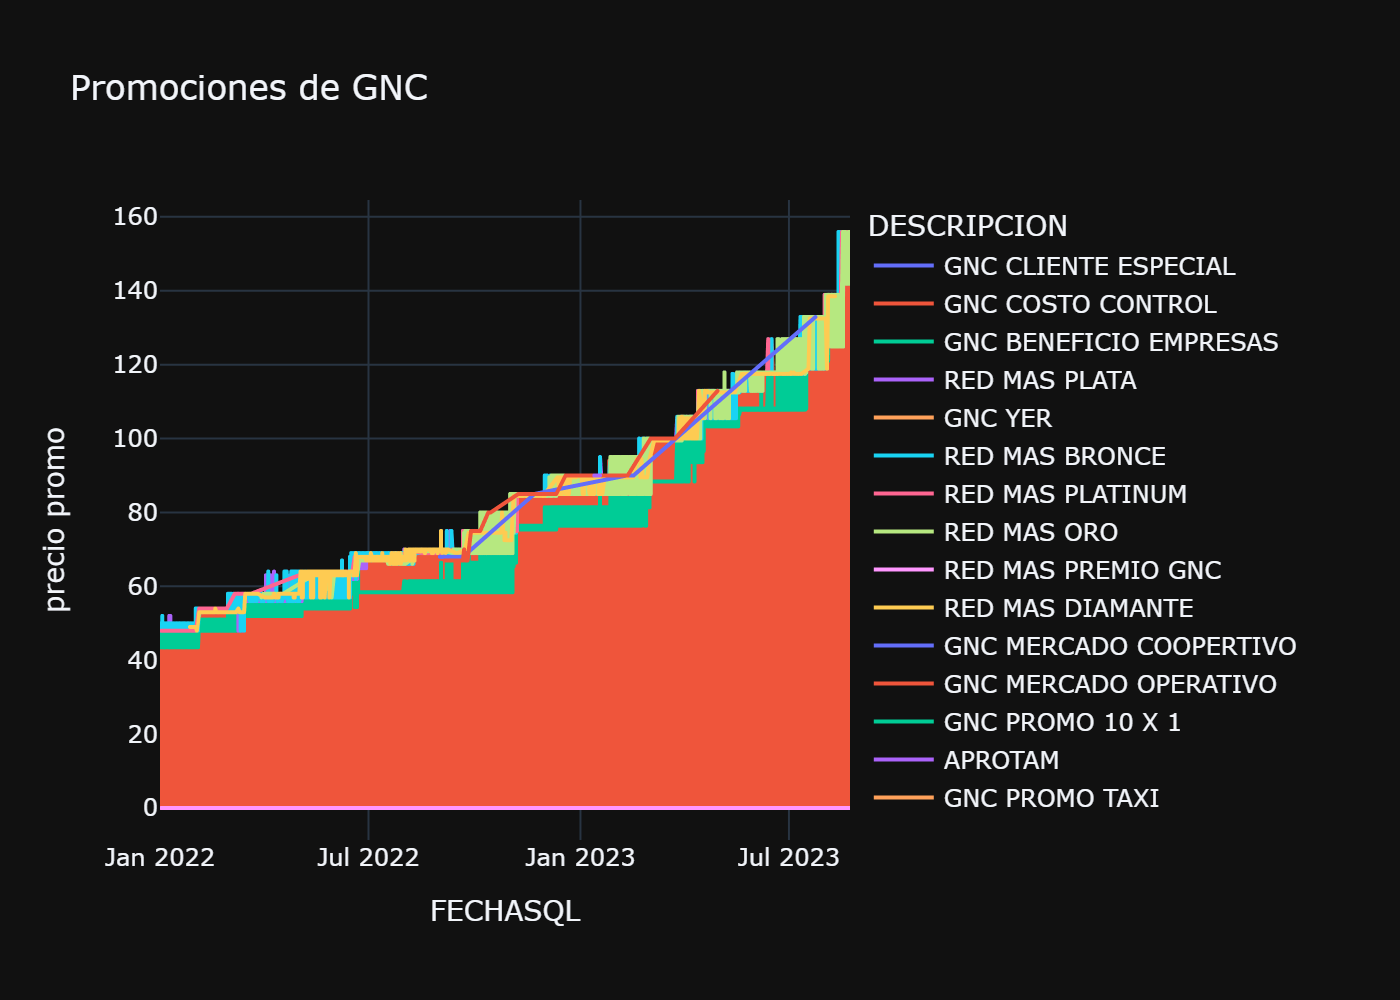

AI-generated follow-up questions:

* What is the maximum price of the GNC promotion?
* What is the total volume of the GNC promotion?
* What is the latest date of the GNC promotion?
* What is the description of the GNC promotion?
* How many promotions are there for GNC?
* What is the average price of the GNC promotion?
* What is the minimum price of the GNC promotion?
* What is the earliest date of the GNC promotion?
* What other products have promotions in the database?
* What is the total volume of promotions for each UEN?


In [31]:
# Ejemplo
sql, df, fig, followup_questions= vn.ask(question='Cuales son las promociones de GNC?',
       print_results=True)

SELECT uen,
       datepart(day, fechasql) as dia,
       sum(volumen) as total_ventas_go
FROM   [rumaos].[dbo].[despapro]
WHERE  codproducto = 'GO'
   and month(fechasql) = month(getdate())
   and year(fechasql) = year(getdate())
GROUP BY uen, datepart(day, fechasql)


C:\Users\gmartinez\AppData\Local\Temp\ipykernel_15828\3645657428.py:4: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,uen,dia,total_ventas_go
0,LAMADRID,19,2552.50
1,PUENTE OLIVE,3,8284.26
2,PERDRIEL,22,38660.69
3,MITRE,20,259.51
4,VILLANUEVA,18,495.58
...,...,...,...
325,ADOLFO CALLE,10,4.94
326,PERDRIEL2,24,4235.62
327,SARMIENTO,3,231.60
328,PERDRIEL2,21,7190.17


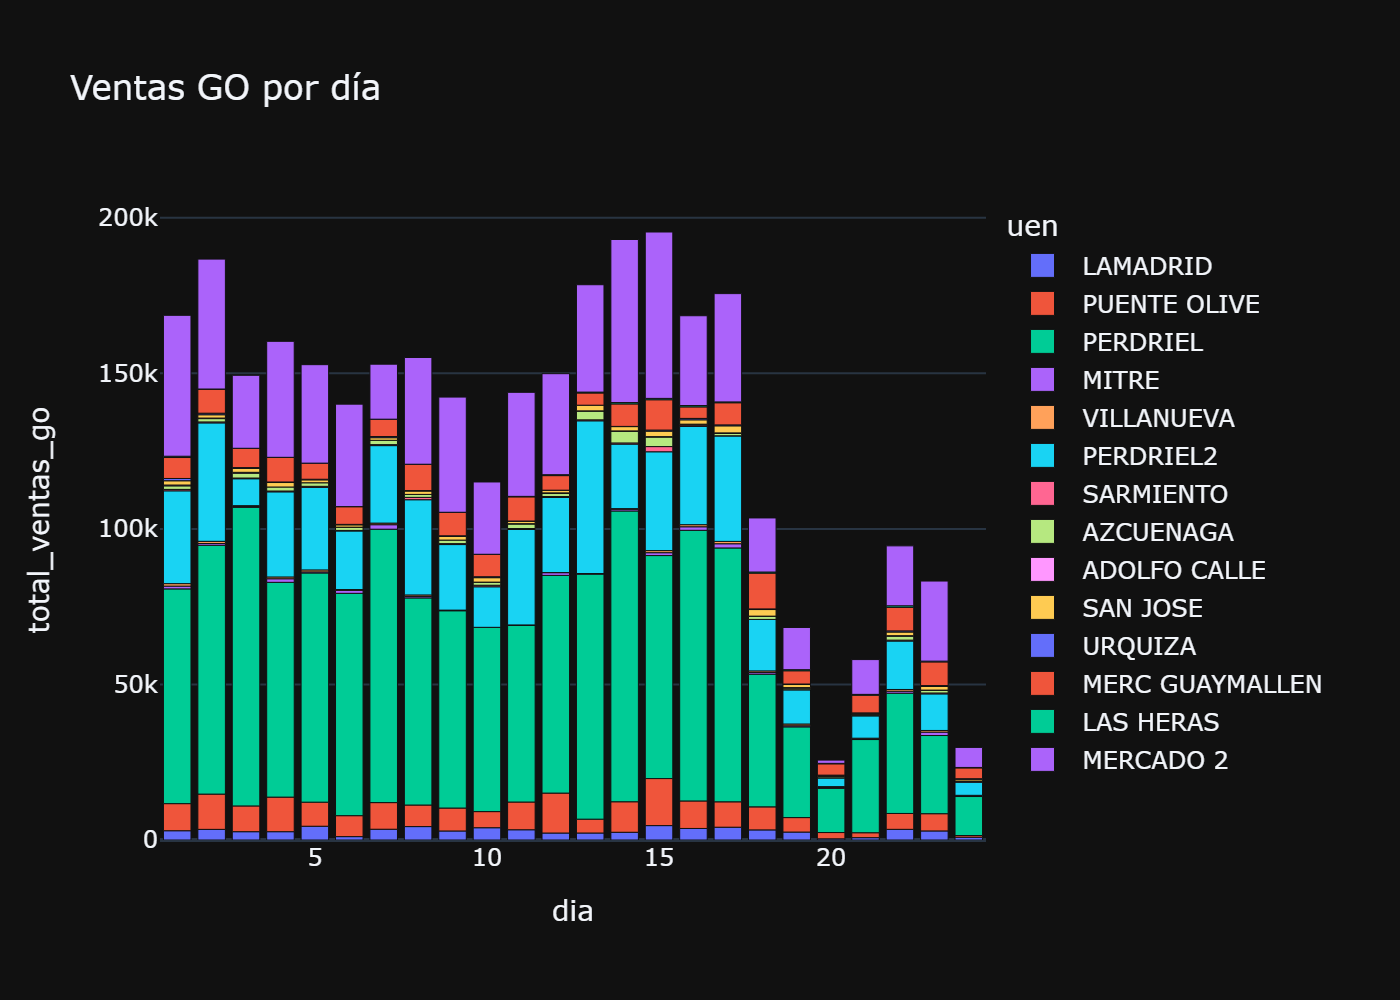

AI-generated follow-up questions:

* What is the total sales of GO for each UEN for the current month?
* Can you provide a breakdown of GO sales by day for each UEN?
* How does the total sales of GO in the current month compare to the previous month?
* What is the average daily sales of GO for each UEN in the current month?
* Are there any specific promotions or discounts associated with the GO sales?
* Can you provide the volume and total sales of other products for each UEN in the current month?
* What is the highest price recorded for GO sales in the current month?
* Is there any correlation between GO sales and the day of the week?
* Are there any outliers or anomalies in the GO sales data for this month?
* Can you provide a comparison of GO sales between different UENs for the current month?


In [53]:
vn.ask(question='Quiero ver todas las ventas de GO del mes actual de cada estacion de servicio. Agrupa los resultados por dia')

In [54]:
vn.get_training_data()


,id,training_data_type,question,content
0,3218-sql,sql,Quiero ver todas las ventas de GO del mes actu...,"SELECT uen,\n datepart(day, fechasql) as..."
1,3190-sql,sql,CUALES SON LAS PROMOCIONES DE GNC?,SELECT *\nFROM promocio\nWHERE descripcion ...
2,456-doc,documentation,None,\n La fecha en las tablas ...
3,3212-sql,sql,Quiero ver todas las ventas de GO del mes actu...,"SELECT datepart(day, fechasql) as dia,\n ..."
4,3210-sql,sql,Quiero ver todas las ventas de GO del mes actual,SELECT *\nFROM [rumaos].[dbo].[despapro]\nWH...
5,3204-sql,sql,Cuanto fueron las ventas de combustible?,"SELECT UEN, TURNO, FECHASQL, CODPRODUCTO, VOLU..."
6,3206-sql,sql,Cuanto fueron las ventas de combustibles?,SELECT sum(volumen) as total_ventas_combustibl...
7,455-doc,documentation,None,En la organizacion hay 14 estaciones de servic...
8,3208-sql,sql,Cuanto fueron las ventas de GO?,SELECT sum(volumen) as total_ventas_go\nFROM ...
9,3199-sql,sql,What is the maximum price of the GNC promotion?,SELECT max(precio)\nFROM promocio\nWHERE de...
